<a href="https://colab.research.google.com/github/rabinkahoonay/test/blob/main/project_capital_markets_24_3_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install yfinance --upgrade --no-cache-dir
#!pip install yahoo_fin
import pandas as pd
import yfinance as yf
import calendar
from datetime import date
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

index_list = ['^GSPC', '^TA125.TA', '^DJI', '^IXIC',
              '^VIX','^VVIX','^VIX9D','^VIX3M','^VIX6M','^VIX1Y',
              '^IRX','^FVX','^TNX','^TYX']
data = yf.download(index_list,'1980-1-1')['Adj Close']
#pd=pd.set_option('display.max_columns', None)
df= pd.DataFrame([[data]])
df=data.fillna(method='ffill')
df = df.reset_index().round(2)
df = df.rename(columns={  '^GSPC' :'S&P500'    ,'^TA125.TA':'TA_125',
                          '^DJI'  :'Dow_Jones' ,'^IXIC'    :'NASDAQ',
                          '^VIX'  :'VIX'       ,'^VVIX'    :'VIX_Index',
                          '^VIX9D':'VIX9D'     ,'^VIX3M'   :'VIX3M',
                          '^VIX6M':'VIX6M'     ,'^VIX1Y'   :'VIX1Y',
                          '^IRX'  :'TB_13W'    ,'^FVX'     :'T5Y',
                          '^TNX'  :'T10Y'      ,'^TYX'     :'T30Y'
                          })
# limit to 2 digits after the decimal point
#daily_data=df.round(2)
# print ("Daily Data of the indices \n   " , daily_data)
# print ("datetime.date" , datetime.date)
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year
df = df.set_index('Date')

[*********************100%%**********************]  14 of 14 completed


In [ ]:
def add_daily_change(df):
  # Identify time series columns (assuming numeric datatypes for simplicity)
  numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
  timeseries_cols = [col for col in numeric_cols if len(df) > 1]  # Ensure there are at least 2 rows

  # Create new columns with daily changes (shift by -1 for difference)
  for col in timeseries_cols:
    df[col + "_p"] = df[col].diff(periods=1).round(2)
    df[col + "_c1"]= (df[col].pct_change(1)*100).round(2)
    df[col + "_c2"]= (df[col].pct_change(2)*100).round(2)
    df[col + "_c3"]= (df[col].pct_change(3)*100).round(2)
  return df



df = add_daily_change(df.copy())  # Operate on a copy to avoid modifying the original
df=df.round(2)
#print("Daily Data of the indices \n   " , df.tail(5))
df.tail(5).T

Date,2024-03-18,2024-03-19,2024-03-20,2024-03-21,2024-03-22
Ticker,,,,,
Dow_Jones,38790.43,39110.76,39512.13,39781.37,39475.90
T5Y,4.36,4.30,4.24,4.25,4.20
S&P500,5149.42,5178.51,5224.62,5241.53,5234.18
TB_13W,5.24,5.24,5.23,5.23,5.22
NASDAQ,16103.45,16166.79,16369.41,16401.84,16428.82
...,...,...,...,...,...
Month_c3,0.00,0.00,0.00,0.00,0.00
Year_p,0.00,0.00,0.00,0.00,0.00
Year_c1,0.00,0.00,0.00,0.00,0.00


In [ ]:
# חישוב ממוצע נע עבור עמדות ספציפיות
New_Names=['S&P500','TA_125','Dow_Jones','NASDAQ','VIX','VIX_Index','VIX9D','VIX3M','VIX6M','VIX1Y','TB_13W','T5Y','T10Y','T30Y']
window_size = 30
for col in New_Names:
    df[col + "_MA30"] = df[col].rolling(window_size).mean().round(2)
df.tail(5).T

Date,2024-03-18,2024-03-19,2024-03-20,2024-03-21,2024-03-22
Ticker,,,,,
Dow_Jones,38790.43,39110.76,39512.13,39781.37,39475.90
T5Y,4.36,4.30,4.24,4.25,4.20
S&P500,5149.42,5178.51,5224.62,5241.53,5234.18
TB_13W,5.24,5.24,5.23,5.23,5.22
NASDAQ,16103.45,16166.79,16369.41,16401.84,16428.82
...,...,...,...,...,...
VIX1Y_MA30,NaN,NaN,NaN,NaN,NaN
TB_13W_MA30,5.23,5.23,5.23,5.23,5.23
T5Y_MA30,4.23,4.23,4.23,4.23,4.23


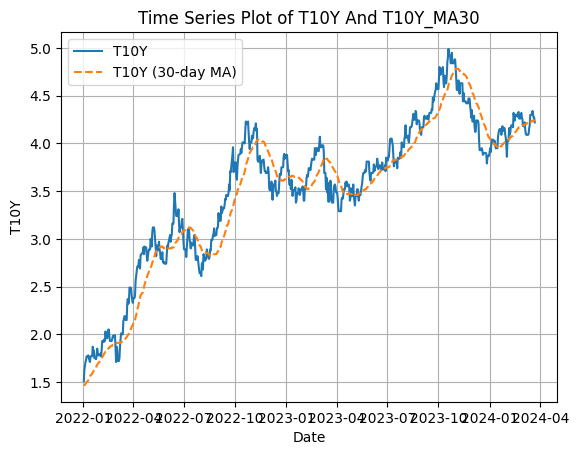

In [ ]:
import matplotlib.pyplot as plt
dates = pd.date_range("2022-01-01", pd.to_datetime("today"))
df1 = df.loc[df.index.isin(dates)]
plt.xlabel('Date')
plt.ylabel('T10Y')
plt.plot(df1.index, df1["T10Y"], linestyle="-", label="T10Y")
plt.plot(df1.index, df1["T10Y_MA30"], linestyle="--", label="T10Y (30-day MA)")
plt.legend()
plt.title('Time Series Plot of T10Y And T10Y_MA30')
plt.grid(True)

In [ ]:
! pip install TA-Lib
import talib as
rsi = talib.RSI(df[New_Names], timeperiod=14)

print(rsi)

  Using cached TA-Lib-0.4.28.tar.gz (357 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for TA-Lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for TA-Lib
Failed to build TA-Lib
ERROR: Could not build wheels for TA-Lib, which is required to install pyproject.toml-based projects


ModuleNotFoundError: No module named 'talib'